# Standard Deviation & Z-score

### Import Necessery Libraries

In [39]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

### Import Data

In [40]:
df = pd.read_csv("heights.csv")
df.sample(5)

,gender,height
5113,Female,60.674278
8195,Female,66.749167
1335,Male,64.922423
6326,Female,66.719377
1036,Male,68.165837


### Visualize

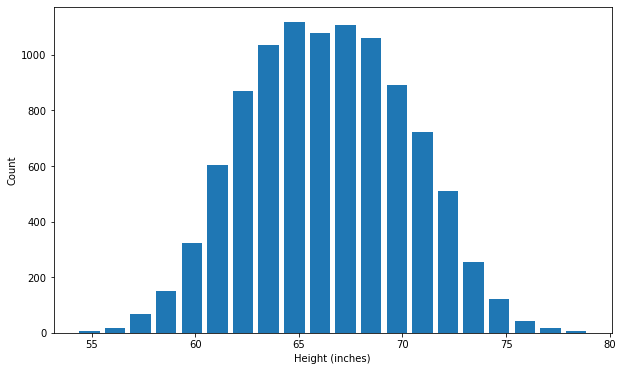

In [41]:
plt.hist(df.height, bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

**Plot bell curve along with histogram for our dataset**

In [42]:
df.height.min()

54.26313333

In [43]:
df.height.max()

78.99874235

In [44]:
df.describe()

,height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


## Standard Deviation

<img src='https://www.mathsisfun.com/data/images/normal-distrubution-3sds.svg'>

In [45]:
df.mean() # In normal distribution, mean = median = mode

height    66.36756
dtype: float64

In [46]:
df.mean()+(1*df.std()) # 1 standard deviation away. Like above first image

height    70.215088
dtype: float64

**As we can see above images, 99.7% of values are within 3 standard deviations of the mean for Normal Distribution**
So, we can remove outlier using 3 standard deviation. <br>
_Note that, how many standar deviation we should take it depends on dataset_

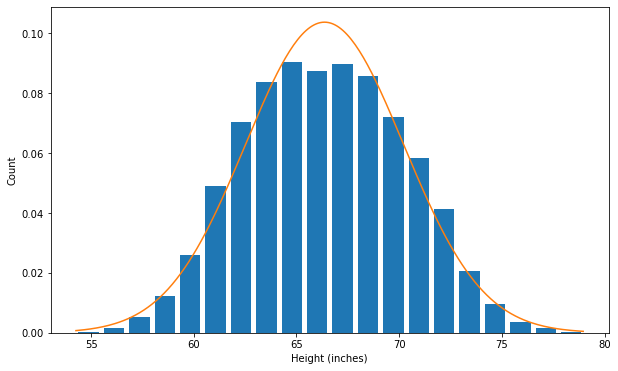

### Detecting Outlier

In [78]:
# Using 3 standard deviation
upper_limit=df.mean()+(3*df.std())
upper_limit

height    77.910144
dtype: float64

In [49]:
lower_limit=df.mean()-(3*df.std())
lower_limit

height    54.824975
dtype: float64

In [80]:
# LEt's see those outliers
df[(df.height>float(upper_limit)) | (df.height<float(lower_limit))]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [83]:
# removing outlier
df2=df[(df.height<float(upper_limit)) & (df.height>float(lower_limit))]

In [84]:
df.shape[0]-df2.shape[0] # so, we removed 7 outliers using standard deviation

7

# Z-score

z-score kind of similar to standard deviation. It returns a number which indicate datapoint is how much far away from mean. If our datapoint is 3 standard deviation away from mean, then z-score for that data point will be 3. if 2.5, it will be 2.5.
<img src='https://www.gstatic.com/education/formulas/images_long_sheet/en/z_score.svg'>
Z	=	standard score <br>
x	=	observed value <br>
\mu	=	mean of the sample <br>
\sigma	=	standard deviation of the sample

In [85]:
df['zscore']=(df.height-df.height.mean())/df.height.std()  #  Calculating z-score
df.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [86]:
(73.847017-66.37)/3.84  # VErifying how we got z-score

1.9471398437499974

## Detecting Outlier using Z-score

In [87]:
df[df['zscore']>3]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [89]:
df[df['zscore']<-3]

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


_These are the same outlier which we detected before using standard deviation_

### Removing Outliers

In [92]:
df_without_outlier=df[(df['zscore']>-3) & (df['zscore']<3)]
df_without_outlier.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [93]:
df.shape[0]-df_without_outlier.shape[0] # So, we removed 7 outliers using z-score

7